In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pandas as pd
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Input, Dropout, BatchNormalization, Reshape
import warnings
warnings.filterwarnings("ignore")

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 43s 0us/step


In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

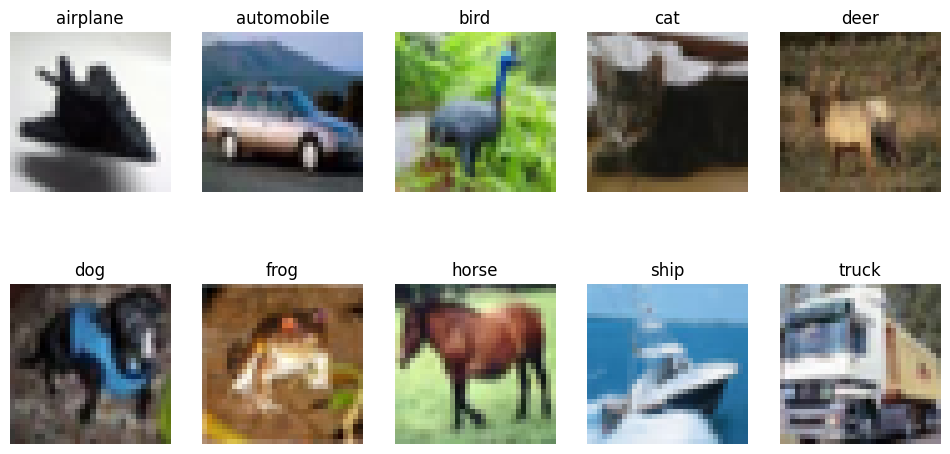

In [9]:
labels = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

images = [x_train[(y_train.flatten()== i).argmax()] for i in range(10)]

plt.figure(figsize=(12,6))
for i, image in enumerate(images):
    plt.subplot(2,5, i+1)
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = np.array(x_train)
x_test = np.array(x_test)

In [11]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [12]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [12]:
#modelling

In [13]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])


In [17]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
    print("Using GPU")
else:
    print("GPU not detected. Check your installation.")

history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=40, batch_size=36, verbose=1)

Using GPU
Epoch 1/40
1389/1389 [==============================] - 16s 11ms/step - loss: 0.1855 - accuracy: 0.9400 - val_loss: 2.4252 - val_accuracy: 0.7227
Epoch 2/40
1389/1389 [==============================] - 15s 11ms/step - loss: 0.1838 - accuracy: 0.9399 - val_loss: 0.8265 - val_accuracy: 0.8094
Epoch 3/40
1389/1389 [==============================] - 15s 11ms/step - loss: 0.1778 - accuracy: 0.9419 - val_loss: 0.9633 - val_accuracy: 0.7966
Epoch 4/40
1389/1389 [==============================] - 16s 11ms/step - loss: 0.1707 - accuracy: 0.9453 - val_loss: 0.8473 - val_accuracy: 0.8092
Epoch 5/40
1389/1389 [==============================] - 16s 11ms/step - loss: 0.1786 - accuracy: 0.9430 - val_loss: 1.1628 - val_accuracy: 0.7932
Epoch 6/40
1389/1389 [==============================] - 16s 11ms/step - loss: 0.1602 - accuracy: 0.9490 - val_loss: 0.8669 - val_accuracy: 0.8051
Epoch 7/40
1389/1389 [==============================] - 15s 11ms/step - loss: 0.1640 - accuracy: 0.9466 - val_loss

In [15]:
model.save('cnn_model.h5')
history.history['accuracy'][-1]

0.9401000142097473

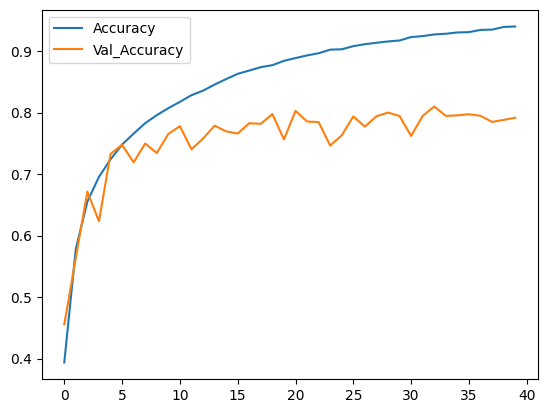

In [16]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();